In [1]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')
  print('There are %d GPU(s) available.' %torch.cuda.device_count())
  print('We will use thr GPU:', torch.cuda.get_device_name(0))

else:
  print('No GPU available, using the CPU instead.')
  device = torch.device('cpu')

There are 1 GPU(s) available.
We will use thr GPU: Tesla T4


In [2]:
!pip install gdown
!gdown --id 13HNXVppR9BOWuwgMRFoHlnCL__LZAp0z --output /content/ship.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13HNXVppR9BOWuwgMRFoHlnCL__LZAp0z
To: /content/ship.zip
100% 260M/260M [00:00<00:00, 277MB/s]


In [3]:
!unzip ship.zip
!rm ship.zip

Archive:  ship.zip
   creating: ship/annotations/
  inflating: ship/annotations/fishing_boat_b_56_0000002.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000007.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000008.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000011.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000013.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000046.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000103.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000113.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000118.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000130.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000132.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000135.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000136.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000141.xml  
  inflating: ship/annotations/fishing_boat_b_56_0000142.xml  
  inflating: ship/an

In [4]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

In [5]:
img_list = sorted(glob.glob('ship/images/*'))
annot_list = sorted(glob.glob('ship/annotations/*'))

In [6]:
print(len(img_list))
print(len(annot_list))

650
650


In [7]:
print(img_list[:10])
print(annot_list[:10])

['ship/images/fishing_boat_b_56_0000002.jpg', 'ship/images/fishing_boat_b_56_0000007.jpg', 'ship/images/fishing_boat_b_56_0000008.jpg', 'ship/images/fishing_boat_b_56_0000011.jpg', 'ship/images/fishing_boat_b_56_0000013.jpg', 'ship/images/fishing_boat_b_56_0000046.jpg', 'ship/images/fishing_boat_b_56_0000103.jpg', 'ship/images/fishing_boat_b_56_0000113.jpg', 'ship/images/fishing_boat_b_56_0000118.jpg', 'ship/images/fishing_boat_b_56_0000130.jpg']
['ship/annotations/fishing_boat_b_56_0000002.xml', 'ship/annotations/fishing_boat_b_56_0000007.xml', 'ship/annotations/fishing_boat_b_56_0000008.xml', 'ship/annotations/fishing_boat_b_56_0000011.xml', 'ship/annotations/fishing_boat_b_56_0000013.xml', 'ship/annotations/fishing_boat_b_56_0000046.xml', 'ship/annotations/fishing_boat_b_56_0000103.xml', 'ship/annotations/fishing_boat_b_56_0000113.xml', 'ship/annotations/fishing_boat_b_56_0000118.xml', 'ship/annotations/fishing_boat_b_56_0000130.xml']


In [8]:
name_lst = []
for imgname in img_list:
  name_lst.append(imgname.split('/')[-1][:-4])

In [9]:
for annotname in annot_list:
  name = annotname.split('/')[-1][:-4]
  if name not in name_lst:
    print(annotname)
    os.remove(annotname)

ship/annotations/fishing_boat_b_56_0022200.xml
ship/annotations/fishing_boat_b_56_0022201.xml
ship/annotations/fishing_boat_b_56_0022202.xml
ship/annotations/fishing_boat_b_56_0022203.xml
ship/annotations/fishing_boat_b_56_0022204.xml
ship/annotations/fishing_boat_b_56_0022205.xml
ship/annotations/fishing_boat_b_56_0022206.xml
ship/annotations/fishing_boat_b_56_0022207.xml
ship/annotations/fishing_boat_b_56_0022208.xml


In [10]:
name_lst = []
for imgname in annot_list:
  name_lst.append(imgname.split('/')[-1][:-4])

In [11]:
for imgname in img_list:
  name = imgname.split('/')[-1][:-4]
  if name not in name_lst:
    print(imgname)
    os.remove(imgname)

ship/images/fishing_boat_b_56_0022220.jpg
ship/images/fishing_boat_b_56_0022221.jpg
ship/images/fishing_boat_b_56_0022222.jpg
ship/images/fishing_boat_b_56_0022223.jpg
ship/images/fishing_boat_b_56_0022224.jpg
ship/images/fishing_boat_b_56_0022225.jpg
ship/images/fishing_boat_b_56_0022226.jpg
ship/images/fishing_boat_b_56_0022227.jpg
ship/images/fishing_boat_b_56_0022228.jpg


In [12]:
img_list = sorted(glob.glob('ship/images/*'))
annot_list = sorted(glob.glob('ship/annotations/*'))
print(len(img_list))
print(len(annot_list))

641
641


In [13]:
def generate_box(obj): # xmin, ymin, xmax, ymax 값을 반환

  xmin = float(obj.find('xmin').text)
  ymin = float(obj.find('ymin').text)
  xmax = float(obj.find('xmax').text)
  ymax = float(obj.find('ymax').text)

  return [xmin, ymin, xmax, ymax]

def generate_label(obj): # 객체에 따른 라벨 반환
  if obj.find('name').text == 'fishing_boat':
    return 1
  elif obj.find('name').text == 'Unknown':
    return 2
  return 0

In [14]:
def generate_target(file): # generate_box와 generate_label를 각각 호출하여 반환된 값을 딕셔너리에 저장해 반환
  with open (file) as f:
    data = f.read()
    soup = BeautifulSoup(data, 'html.parser') # html.parser를 이용해 annotations 파일에 있는 내용을 불러 ..
    objects = soup.find_all('object')

    num_objs = len(objects)

    boxes = []
    labels = []
    for i in objects:
      boxes.append(generate_box(i))
      labels.append(generate_label(i))

    boxes = torch.as_tensor(boxes, dtype=torch.float32)
    labels = torch.as_tensor(labels, dtype=torch.int64)

    target = {}
    target['boxes'] = boxes
    target['labels'] = labels

    return target

In [15]:
def plot_image(img_path, annotation):

  img = mpimg.imread(img_path)

  fig,ax = plt.subplots(1)
  ax.imshow(img)

  for idx in range(len(annotation['boxes'])):
    xmin, ymin, xmax, ymax = annotation['boxes'][idx]
    if annotation['labels'][idx] == 0:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='r', facecolor='none')
    elif annotation['labels'][idx] == 1:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='y', facecolor='none')
    else:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='orange', facecolor='none')
    ax.add_patch(rect)
  plt.show()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


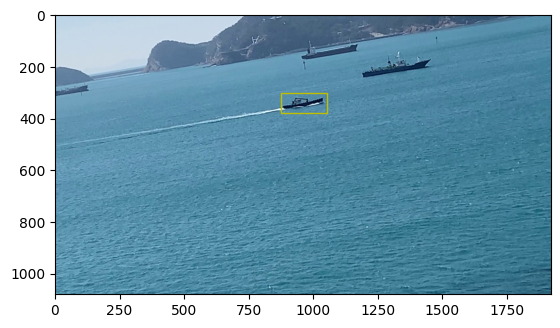

In [16]:
bbox = generate_target(annot_list[100])
plot_image(img_list[100], bbox)

In [17]:
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import albumentations.pytorch
from matplotlib import pyplot as plt
import os
import random

class TorchvisionShipDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))
        self.transform = transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)

        if 'test' in self.path:
            label_path = os.path.join("/content/ship/test_annotations/", file_label)
        else:
            label_path = os.path.join("/content/ship/annotations/", file_label)

        img = Image.open(img_path).convert("RGB")
        target = generate_target(label_path)

        start_t = time.time()
        if self.transform:
            img = self.transform(img)

        total_time = (time.time() - start_t)

        return img, target, total_time

In [18]:
torchvision_transform = transforms.Compose([
    transforms.Resize((300, 300)), # Resize 함수를 통해 이미지 크기를 조정
    transforms.RandomCrop(224), # RandomCrop 함수를 통해 이미지 자름
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    # ColoerJitter 함수는 밝기, 대비, 채도, 색조 등을 임의로 바꾸는 기능
    transforms.RandomHorizontalFlip(p = 1), # RandomHorizontalFlip은 정의한 p의 확률로 좌우반전
    transforms.ToTensor(), # 텐서 자료형으로 변환
])

In [19]:
# plot_image_from_output함수는 torch.Tensor로 변환된 이미지를 시각화
def plot_image_from_output(img, annotation):

  img = img.permute(1, 2, 0)

  fig,ax = plt.subplots(1)
  ax.imshow(img)

  for idx in range(len(annotation['boxes'])):
    xmin, ymin, xmax, ymax = annotation['boxes'][idx]
    if annotation['labels'][idx] == 0:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='r', facecolor='none')
    elif annotation['labels'][idx] == 1:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='y', facecolor='none')
    else:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='orange', facecolor='none')
    ax.add_patch(rect)
  plt.show()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


transforms 적용 전


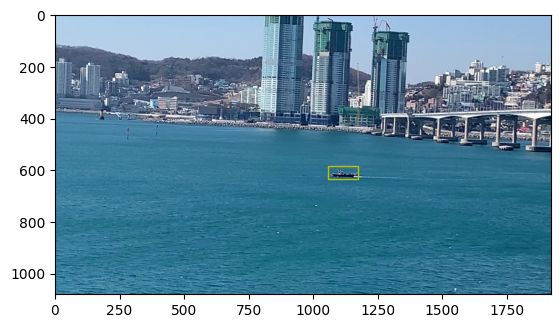

{'boxes': tensor([[1056.,  582., 1174.,  633.]]), 'labels': tensor([1])}


In [20]:
only_totensor = transforms.Compose([transforms.ToTensor()])

torchvision_dataset_no_transform = TorchvisionShipDataset(
    path = '/content/ship/images/',
    transform = only_totensor
)

img, annot, transform_time = torchvision_dataset_no_transform[5]
print('transforms 적용 전')
plot_image_from_output(img, annot)
print(annot)

transforms 적용 후


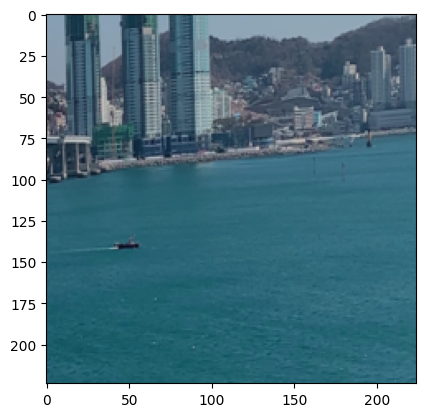

{'boxes': tensor([[1056.,  582., 1174.,  633.]]), 'labels': tensor([1])}


In [21]:
torchvision_dataset = TorchvisionShipDataset(
    path = '/content/ship/images/',
    transform = torchvision_transform
)

img, annot, transform_time = torchvision_dataset[5]

print('transforms 적용 후')
plot_image_from_output(img, annot)
print(annot)


In [22]:
class AlbumentationsDataset(Dataset):
  def __init__(self, path, transform=None):
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))
    self.transform = transform

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-3] + 'xml'
    img_path = os.path.join(self.path, file_image)

    if 'test' in self.path:
        label_path = os.path.join("/content/ship/test_annotations/", file_label)
    else:
        label_path = os.path.join("/content/ship/annotations/", file_label)

    # Read an image with OpenCV
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    target = generate_target(label_path)

    start_t = time.time()
    if self.transform:
      augmented = self.transform(image=image)
      total_time = (time.time() - start_t)
      image = augmented['image']

    return img, target, total_time

In [23]:
albumentations_transform = albumentations.Compose([
    albumentations.Resize(300, 300),
    albumentations.RandomCrop(224, 224),
    albumentations.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    albumentations.HorizontalFlip(p=1),
    albumentations.pytorch.ToTensorV2(), # 텐서 자료형으로 변환
])

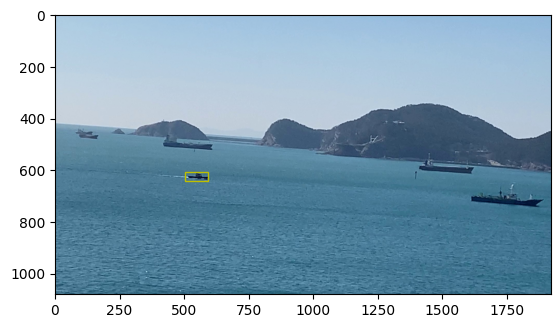

{'boxes': tensor([[504., 606., 594., 641.]]), 'labels': tensor([1])}


In [24]:
# 변경 전
img, annot, transform_time = torchvision_dataset_no_transform[0]
plot_image_from_output(img, annot)
print(annot)

tensor([504., 606., 594., 641.])


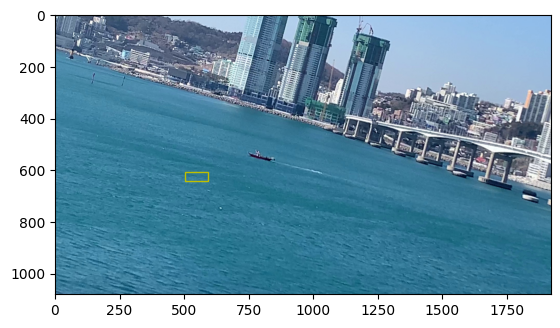

{'boxes': tensor([[504., 606., 594., 641.]]), 'labels': tensor([1])}


In [81]:
# 변경 후
albumentation_dataset = AlbumentationsDataset(
    path = '/content/ship/images/',
    transform = albumentations_transform
)

img, annot, transform_time = albumentation_dataset[0]
plot_image_from_output(img, annot)
print(annot)

In [26]:
class BboxAugmentationDataset(Dataset):
  def __init__(self, path, transform=None):
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))
    self.transform = transform

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-3] + 'xml'
    img_path = os.path.join(self.path, file_image)

    if 'test' in self.path:
        label_path = os.path.join("/content/ship/test_annotations/", file_label)
    else:
        label_path = os.path.join("/content/ship/annotations/", file_label)

    # Read an image with OpenCV
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    target = generate_target(label_path)

    if self.transform:
      transformed = self.transform(image = image, bboxes = target['boxes'],
                                   labels = target['labels'])
      image = transformed['image']
      target = {'boxes': transformed['bboxes'], 'labels': transformed['labels']}

    return img, target

In [27]:
bbox_transform = albumentations.Compose(
    [albumentations.HorizontalFlip(p=1),
     albumentations.Rotate(p=1),
     albumentations.pytorch.ToTensorV2()],
    bbox_params=albumentations.BboxParams(format='pascal_voc', label_fields=['labels']),
)

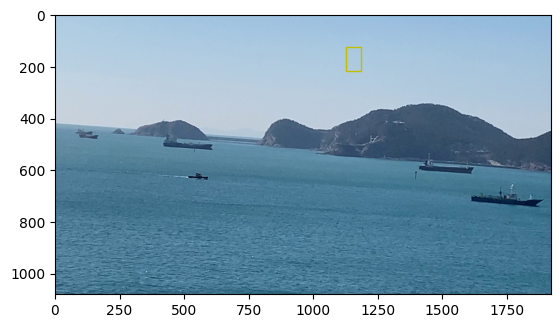

{'boxes': [(1125.926284790039, 120.76950788497925, 1184.7460556030273, 216.97163343429565)], 'labels': [tensor(1)]}


In [28]:
bbox_transform_dataset = BboxAugmentationDataset(
    path = '/content/ship/images/',
    transform = bbox_transform
)

img, annot = bbox_transform_dataset[0]
plot_image_from_output(img, annot)
print(annot)

In [29]:
print(len(os.listdir('/content/ship/annotations')))
print(len(os.listdir('/content/ship/images')))

641
641


In [30]:
%cd /content/ship/

/content/ship


In [31]:
!mkdir test_images
!mkdir test_annotations

In [32]:
import random
random.seed(1234)
img_len = len(os.listdir('/content/ship/images'))
idx = random.sample(range(img_len), 100)
print(len(idx))
print(idx[:10])

100
[451, 119, 7, 92, 596, 35, 85, 100, 363, 242]


In [33]:
import numpy as np
import shutil

for img in np.array(sorted(os.listdir('/content/ship/images')))[idx]:
    shutil.move('images/' + img, 'test_images/' + img)

for annot in np.array(sorted(os.listdir('/content/ship/annotations')))[idx]:
    shutil.move('annotations/' + annot, 'test_annotations/' + annot)

In [34]:
print(len(os.listdir('annotations')))
print(len(os.listdir('images')))
print(len(os.listdir('test_annotations')))
print(len(os.listdir('test_images')))

541
541
100
100


In [35]:
from tqdm.notebook import tqdm
import pandas as pd
from collections import Counter

def get_num_objects_for_each_class(dataset):

  total_labels = []
  for img, annot in tqdm(dataset, position = 0, leave = True):
    total_labels += [int(i) for i in annot['labels']]

  return Counter(total_labels)

train_data = BboxAugmentationDataset(
    path = '/content/ship/images/'
)

test_data = BboxAugmentationDataset(
    path = '/content/ship/test_images/'
)

train_objects = get_num_objects_for_each_class(train_data)
test_objects = get_num_objects_for_each_class(test_data)

print('\n train 데이터에 있는 객체', train_objects)
print('\n test 데이터에 있는 객체', test_objects)

  0%|          | 0/541 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]


 train 데이터에 있는 객체 Counter({1: 541})

 test 데이터에 있는 객체 Counter({1: 100})


In [36]:
import os
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from PIL import Image
import torchvision
from torchvision import transforms, datasets, models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import time

In [37]:
class ShipDataset(object):
  def __init__(self, transforms, path):
    '''
    path: path to train folder or test foler
    '''

    # transfrom module과 img path 경로를 정의
    self.transforms = transforms
    self.path = path
    self.imgs = list(sorted(os.listdir(self.path)))

  def __getitem__(self, idx): # special method
    # load images ad masks
    file_image = self.imgs[idx]
    file_label = self.imgs[idx][:-3] + 'xml'
    img_path = os.path.join(self.path, file_image)

    if 'test' in self.path:
      label_path = os.path.join('/content/ship/test_annotations/', file_label)
    else:
      label_path = os.path.join('/content/ship/annotations/', file_label)

    img = Image.open(img_path).convert('RGB')
    target = generate_target(label_path)

    if self.transforms is not None:
      img = self.transforms(img)

    return img, target

  def __len__(self):
    return len(self.imgs)
# transforms.Compose : list 내의 작업을 연달아 할 수 있게 호출하는 클래스
data_transform = transforms.Compose([
    transforms.ToTensor() # ToTensor: numpy 이미지에서 torch 이미지로 변경
])

In [38]:
def collate_fn(batch):
  return tuple(zip(*batch))

dataset = ShipDataset(data_transform, '/content/ship/images/')
test_dataset = ShipDataset(data_transform, '/content/ship/test_images/')

data_loader = torch.utils.data.DataLoader(dataset, batch_size = 4, collate_fn = collate_fn)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 2, collate_fn = collate_fn)

In [39]:
def get_model_instance_segmentation(num_classes):

  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

  return model

In [40]:
len(train_objects.keys()) + 1

2

In [41]:
# 실제 데이터셋의 클래스 개수에 1개를 늘려 background 클래스를 추가 (num_classes +1)
num_classes = len(train_objects.keys()) + 1
num_classes

2

In [42]:
model = get_model_instance_segmentation(num_classes)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 206MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [43]:
num_epochs = 10
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

In [44]:
print('------------------------------train start------------------------')
for epoch in tqdm(range(num_epochs)):
  start = time.time()
  model.train()
  i = 0
  epoch_loss = 0
  for imgs, annotations in data_loader:
    i += 1
    imgs = list(img.to(device) for img in imgs)
    annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
    loss_dict = model(imgs, annotations)
    losses = sum(loss for loss in loss_dict.values())

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()
    epoch_loss += losses
  print(f'epoch: {epoch+1}, Loss: {epoch_loss}, time: {time.time() - start}')
print('--------------------train end-------------')

------------------------------train start------------------------


  0%|          | 0/10 [00:00<?, ?it/s]

epoch: 1, Loss: 20.059734344482422, time: 156.206969499588
epoch: 2, Loss: 14.249344825744629, time: 148.55103754997253
epoch: 3, Loss: 11.58692741394043, time: 148.05817294120789
epoch: 4, Loss: 11.227108001708984, time: 148.07841396331787
epoch: 5, Loss: 10.351696968078613, time: 151.03914308547974
epoch: 6, Loss: 9.314847946166992, time: 151.34218645095825
epoch: 7, Loss: 8.79883861541748, time: 151.14051914215088
epoch: 8, Loss: 8.027339935302734, time: 152.35645270347595
epoch: 9, Loss: 7.444499492645264, time: 150.82908272743225
epoch: 10, Loss: 6.607413291931152, time: 150.2817542552948
--------------------train end-------------


In [78]:
torch.save(model.state_dict(), f'model_{num_epochs}.pt') # torch.save를 이용하여 학습된 가중치 저장

In [46]:
!pwd

/content/ship


In [79]:
model.load_state_dict(torch.load(f'model_{num_epochs}.pt'))

<All keys matched successfully>

In [67]:
# 예측
def make_prediction(model, img, threshold):
  model.eval()
  preds = model(img)
  for id in range(len(preds)):
    idx_list = []

    for idx, score in enumerate(preds[id]['scores']):
      if score > threshold:
        idx_list.append(idx)

    preds[id]['boxes'] = preds[id]['boxes'][idx_list]
    preds[id]['labels'] = preds[id]['labels'][idx_list]
    preds[id]['scores'] = preds[id]['scores'][idx_list]

  return preds

In [68]:
with torch.no_grad():
  # 테스트셋 배치사이즈 = 2
  for imgs, annotations in test_data_loader:
    imgs = list(img.to(device) for img in imgs)

    pred = make_prediction(model, imgs, 0.5)
    print(pred)
    break

[{'boxes': tensor([[1056.9972,  589.5872, 1190.9598,  635.7395]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9175], device='cuda:0')}, {'boxes': tensor([[736.1597, 519.5385, 862.1862, 575.1348]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9874], device='cuda:0')}]


In [69]:
# plot_image_from_output함수는 torch.Tensor로 변환된 이미지를 시각화
def plot_image_from_output(img, annotation):

  img = img.permute(1, 2, 0)

  fig,ax = plt.subplots(1)
  ax.imshow(img)

  for idx in range(len(annotation['boxes'])):
    print(annotation['boxes'][idx].to(torch.device('cpu')))
    xmin, ymin, xmax, ymax = annotation['boxes'][idx].to(torch.device('cpu'))
    if annotation['labels'][idx] == 0:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='r', facecolor='none')
    elif annotation['labels'][idx] == 1:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='y', facecolor='none')
    else:
      rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='orange', facecolor='none')
    ax.add_patch(rect)
  plt.show()

In [50]:
imgs[_idx]

NameError: ignored

In [51]:
annotations[_idx]

NameError: ignored

In [52]:
img, annotations

('fishing_boat_b_56_0013334.jpg',
 ({'boxes': tensor([[1056.,  582., 1174.,  633.]]), 'labels': tensor([1])},
  {'boxes': tensor([[742., 518., 871., 573.]]), 'labels': tensor([1])}))

Target :  tensor([1])
tensor([742., 518., 871., 573.])


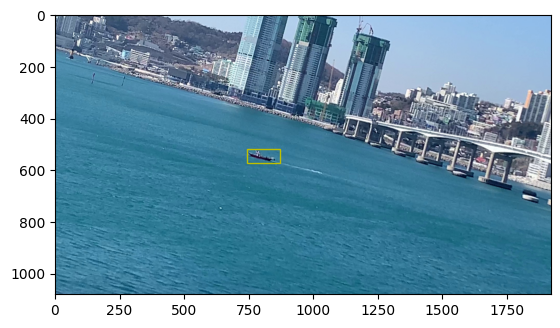

Prediction :  tensor([1], device='cuda:0')
tensor([736.1597, 519.5385, 862.1862, 575.1348])


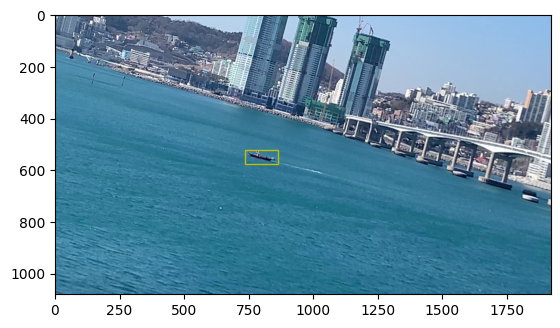

In [70]:
_idx = 1
img = imgs[_idx].to(torch.device('cpu'))
print("Target : ", annotations[_idx]['labels'])
org_boxes = annotations[_idx]['boxes'].to(torch.device('cpu'))
org_labels = annotations[_idx]['labels'].to(torch.device('cpu'))
org_cpu_tensor={'boxes':org_boxes, 'labels':org_labels}
plot_image_from_output(img, org_cpu_tensor)

print("Prediction : ", pred[_idx]['labels'])
pred_boxes = pred[_idx]['boxes'].to(torch.device('cpu'))
pred_labels = pred[_idx]['labels'].to(torch.device('cpu'))
pred_cpu_tensor={'boxes':pred_boxes, 'labels':pred_labels}

plot_image_from_output(img, pred_cpu_tensor)

In [75]:
labels = []
preds_adj_all = []
annot_all = []

for im, annot in tqdm(test_data_loader, position = 0, leave = True):
  im = list(img.to(device) for img in im)
  # annot = [{k: v.to(device) for k, v in t.items()} for t in annot]

  for t in annot:
    labels += t['labels']

  with torch.no_grad():
    preds_adj = make_prediction(model, im, 0.5)
    preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
    preds_adj_all.append(preds_adj)
    annot_all.append(annot)

  0%|          | 0/50 [00:00<?, ?it/s]

In [76]:
'''
mAP 계산 함수
'''

def get_batch_statistics(outputs, targets, iou_threshold):
    """ Compute true positives, predicted scores and predicted labels per sample """
    batch_metrics = []
    for sample_i in range(len(outputs)):

        if outputs[sample_i] is None:
            continue

        output = outputs[sample_i] # predict
        # pred_boxes = output['boxes']
        # pred_scores = output['scores']
        # pred_labels = output['labels']

        true_positives = torch.zeros(output['boxes'].shape[0])   # 예측 객체 개수

        annotations = targets[sample_i]  # actual
        target_labels = annotations['labels'] if len(annotations) else []
        if len(annotations):    # len(annotations) = 3
            detected_boxes = []
            target_boxes = annotations['boxes']

            for pred_i, (pred_box, pred_label) in enumerate(zip(output['boxes'], output['labels'])): # 예측값에 대해서..

                # If targets are found break
                if len(detected_boxes) == len(target_labels): # annotations -> target_labels
                    break

                # Ignore if label is not one of the target labels
                if pred_label not in target_labels:
                    continue

                iou, box_index = bbox_iou(pred_box.unsqueeze(0), target_boxes).max(0)   # box_index : 실제 어떤 바운딩 박스랑 IoU 가 가장 높은지 index
                if iou >= iou_threshold and box_index not in detected_boxes: # iou만 맞으면 통과?
                    true_positives[pred_i] = 1
                    detected_boxes += [box_index]  # 예측된거랑 실제랑 매핑해서 하나씩 index 채움
        batch_metrics.append([true_positives, output['scores'], output['labels']])
    return batch_metrics

def bbox_iou(box1, box2, x1y1x2y2=True):
    """
    Returns the IoU of two bounding boxes
    """
    if not x1y1x2y2:
        # Transform from center and width to exact coordinates
        b1_x1, b1_x2 = box1[:, 0] - box1[:, 2] / 2, box1[:, 0] + box1[:, 2] / 2
        b1_y1, b1_y2 = box1[:, 1] - box1[:, 3] / 2, box1[:, 1] + box1[:, 3] / 2
        b2_x1, b2_x2 = box2[:, 0] - box2[:, 2] / 2, box2[:, 0] + box2[:, 2] / 2
        b2_y1, b2_y2 = box2[:, 1] - box2[:, 3] / 2, box2[:, 1] + box2[:, 3] / 2
    else:
        # Get the coordinates of bounding boxes
        b1_x1, b1_y1, b1_x2, b1_y2 = box1[:, 0], box1[:, 1], box1[:, 2], box1[:, 3]
        b2_x1, b2_y1, b2_x2, b2_y2 = box2[:, 0], box2[:, 1], box2[:, 2], box2[:, 3]

    # get the corrdinates of the intersection rectangle
    inter_rect_x1 = torch.max(b1_x1, b2_x1)
    inter_rect_y1 = torch.max(b1_y1, b2_y1)
    inter_rect_x2 = torch.min(b1_x2, b2_x2)
    inter_rect_y2 = torch.min(b1_y2, b2_y2)
    # Intersection area
    inter_area = torch.clamp(inter_rect_x2 - inter_rect_x1 + 1, min=0) * torch.clamp(inter_rect_y2 - inter_rect_y1 + 1, min=0)
    # Union Area
    b1_area = (b1_x2 - b1_x1 + 1) * (b1_y2 - b1_y1 + 1)
    b2_area = (b2_x2 - b2_x1 + 1) * (b2_y2 - b2_y1 + 1)

    iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)

    return iou

def ap_per_class(tp, conf, pred_cls, target_cls):
    """ Compute the average precision, given the recall and precision curves.
    Source: https://github.com/rafaelpadilla/Object-Detection-Metrics.
    # Arguments
        tp:    True positives (list).
        conf:  Objectness value from 0-1 (list).
        pred_cls: Predicted object classes (list).
        target_cls: True object classes (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """

    # Sort by objectness
    i = torch.argsort(-conf)
    tp, conf, pred_cls = tp[i], conf[i], pred_cls[i]

    # Find unique classes
    unique_classes = torch.unique(target_cls)   # 2가 거의 예측안됨

    # Create Precision-Recall curve and compute AP for each class
    ap, p, r = [], [], []
    for c in unique_classes:
        i = pred_cls == c
        n_gt = (target_cls == c).sum()  # Number of ground truth objects
        n_p = i.sum()  # Number of predicted objects

        if n_p == 0 and n_gt == 0:
            continue
        elif n_p == 0 or n_gt == 0:
            ap.append(0)
            r.append(0)
            p.append(0)
        else:
            # Accumulate FPs and TPs
            fpc = torch.cumsum(1 - tp[i],-1)
            tpc = torch.cumsum(tp[i],-1)

            # Recall
            recall_curve = tpc / (n_gt + 1e-16)
            r.append(recall_curve[-1])

            # Precision
            precision_curve = tpc / (tpc + fpc)
            p.append(precision_curve[-1])

            # AP from recall-precision curve
            ap.append(compute_ap(recall_curve, precision_curve))

    # Compute F1 score (harmonic mean of precision and recall)
    p, r, ap = torch.tensor(np.array(p)), torch.tensor(np.array(r)), torch.tensor(np.array(ap))
    f1 = 2 * p * r / (p + r + 1e-16)

    return p, r, ap, f1, unique_classes

def compute_ap(recall, precision):
    """ Compute the average precision, given the recall and precision curves.
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.
    # Arguments
        recall:    The recall curve (list).
        precision: The precision curve (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """
    # correct AP calculation
    # first append sentinel values at the end
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([0.0], precision, [0.0]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

In [77]:
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
  sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i],
                                         iou_threshold=0.5)

true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
# 배치가 전부 합쳐짐
precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels,
                                                   torch.tensor(labels))
mAP = torch.mean(AP)
print(f'mAP : {mAP}')
print(f'AP : {AP}')

mAP : 0.86638248229551
AP : tensor([0.8664], dtype=torch.float64)
